In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
plt.style.use('ggplot')

In [3]:
data = pd.read_csv('Ghana_Covid19_DailyActive.csv')
data

,confirmed,recovered,death,date,cumulative_confirmed,cumulative_recovered,cumulative_death,active_cases
0,2,0,0,03/12/2020,2,0,0,2
1,2,0,0,03/13/2020,4,0,0,4
2,2,0,0,03/14/2020,6,0,0,6
3,1,0,0,03/17/2020,7,0,0,7
4,2,0,0,03/18/2020,9,0,0,9
...,...,...,...,...,...,...,...,...
228,49,78,0,11/23/2020,51274,50205,323,746
229,105,93,0,11/24/2020,51379,50298,323,758
230,97,60,0,11/25/2020,51476,50358,323,795
231,93,92,0,11/26/2020,51569,50450,323,796


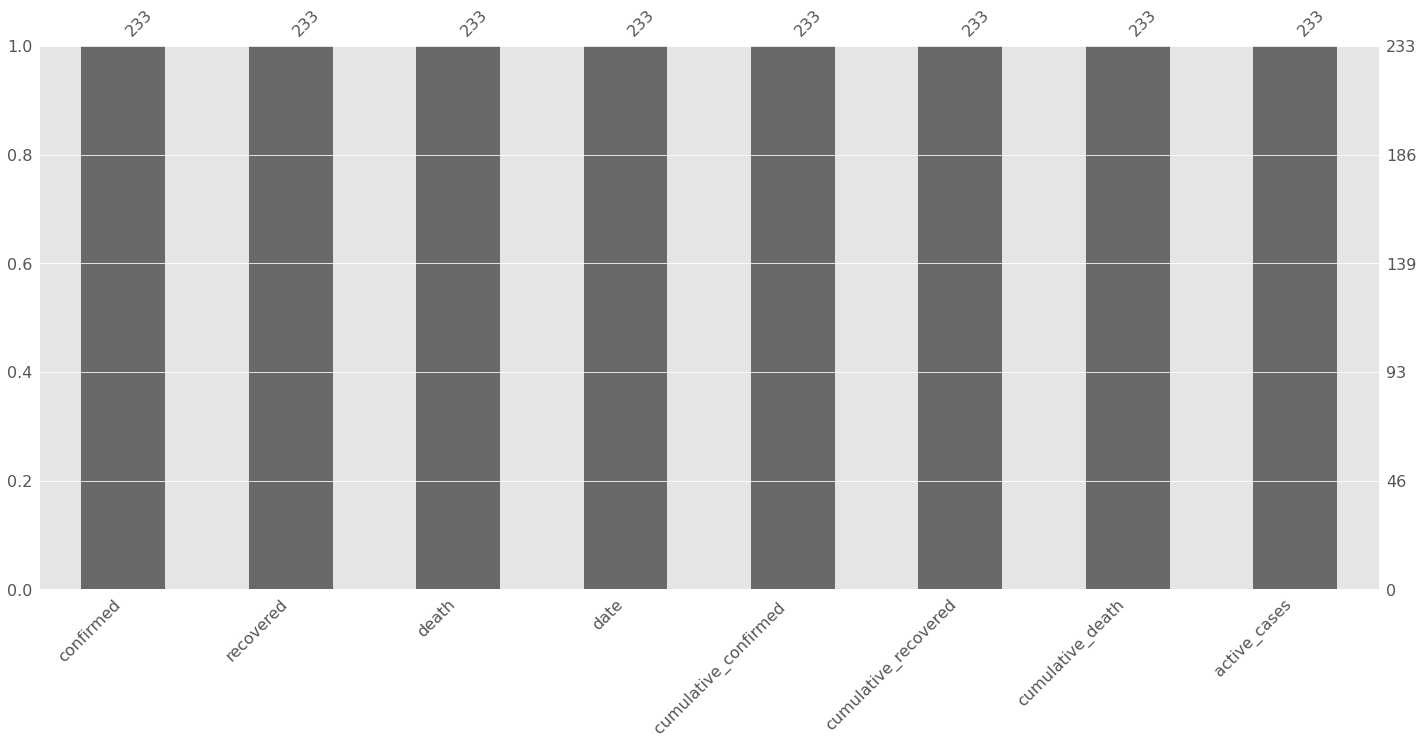

In [4]:
msno.bar(data);

In [5]:
data.describe()

,confirmed,recovered,death,cumulative_confirmed,cumulative_recovered,cumulative_death,active_cases
count,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000
mean,221.746781,216.939914,1.386266,28642.167382,26223.437768,174.386266,2244.343348
std,241.394370,441.662539,2.569077,19231.469481,20028.783253,124.097661,2066.144590
min,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000
25%,59.000000,32.000000,0.000000,8070.000000,2947.000000,36.000000,524.000000
50%,131.000000,97.000000,0.000000,35501.000000,32096.000000,182.000000,1384.000000
75%,295.000000,221.000000,2.000000,46626.000000,45757.000000,301.000000,3782.000000
max,1513.000000,5526.000000,15.000000,51667.000000,50547.000000,323.000000,8585.000000


In [6]:
data_stat = data.describe().T

In [7]:
central_ten = data_stat[['mean','std','50%']]
central_ten

,mean,std,50%
confirmed,221.746781,241.394370,131.0
recovered,216.939914,441.662539,97.0
death,1.386266,2.569077,0.0
cumulative_confirmed,28642.167382,19231.469481,35501.0
cumulative_recovered,26223.437768,20028.783253,32096.0
cumulative_death,174.386266,124.097661,182.0
active_cases,2244.343348,2066.144590,1384.0


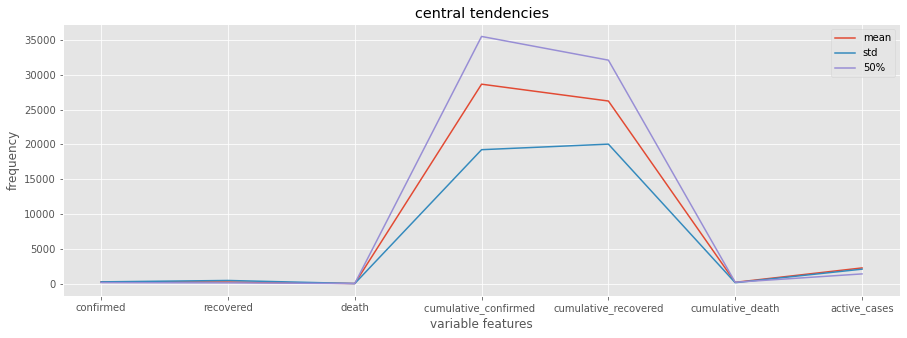

In [8]:
plt.subplots(figsize=(15,5))
plt.plot(central_ten,label=central_ten.columns)
plt.xlabel('variable features')
plt.ylabel('frequency')
plt.title('central tendencies')
plt.legend()

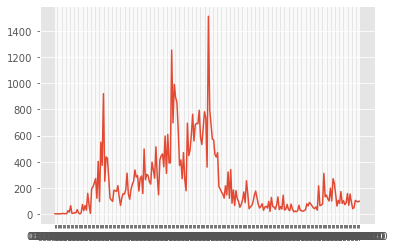

In [9]:
data.confirmed.plot()
plt.xticks(ticks=data.index,labels=data.date,rotation=360);

In [10]:
data.date

0      03/12/2020
1      03/13/2020
2      03/14/2020
3      03/17/2020
4      03/18/2020
          ...    
228    11/23/2020
229    11/24/2020
230    11/25/2020
231    11/26/2020
232    11/27/2020
Name: date, Length: 233, dtype: object

In [11]:
data[['month','day','year']] = data.date.str.split('/', expand=True)

In [12]:
data[['month','day','year']]

,month,day,year
0,03,12,2020
1,03,13,2020
2,03,14,2020
3,03,17,2020
4,03,18,2020
...,...,...,...
228,11,23,2020
229,11,24,2020
230,11,25,2020
231,11,26,2020


In [13]:
confirmed_cases=data.groupby('month')['confirmed'].sum()

<AxesSubplot:xlabel='month'>

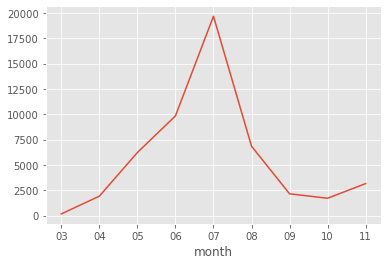

In [14]:

confirmed_cases.plot()

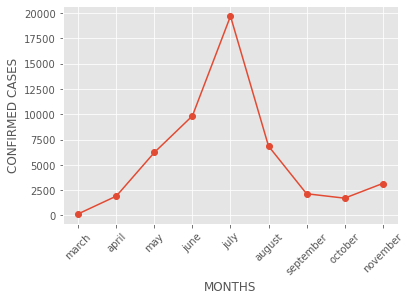

In [15]:
xlabel = ['march','april','may','june','july','august','september','october','november']
#plt.subplots(figsize=(15,5))
plt.plot(data.month.unique(),confirmed_cases,marker='o')
plt.xlabel('MONTHS')
plt.ylabel('CONFIRMED CASES')
#plt.grid()

plt.xticks(ticks=data.month.unique().tolist(),labels=xlabel,rotation=45);

<AxesSubplot:>

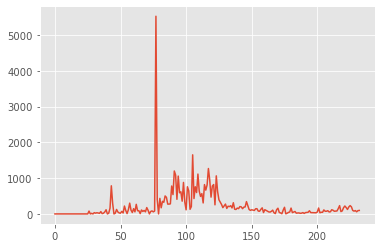

In [16]:
data.recovered.plot()

In [17]:
recovered_cases=data.groupby('month')['recovered'].sum()

<AxesSubplot:xlabel='month'>

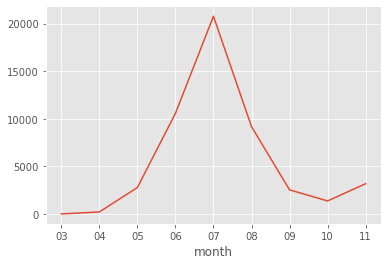

In [18]:
recovered_cases.plot()

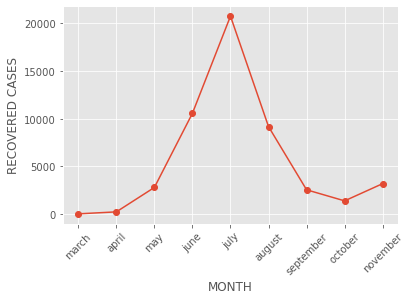

In [19]:
plt.plot(data.month.unique(),recovered_cases,marker='o')
plt.xlabel('MONTH')
plt.ylabel('RECOVERED CASES')
plt.xticks(data.month.unique().tolist(),labels=xlabel,rotation=45);

C:\Users\Theophilus Bassaw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='confirmed'>

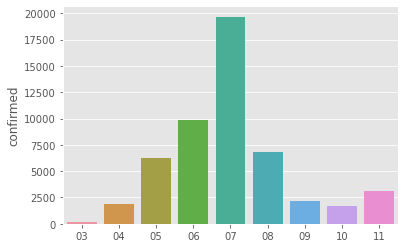

In [20]:
sns.barplot(data.month.unique(),confirmed_cases)

<AxesSubplot:xlabel='month'>

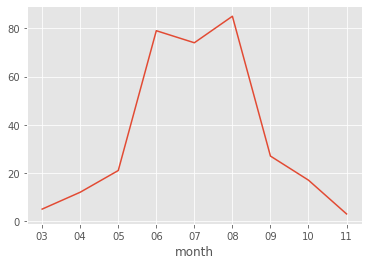

In [21]:
death_per_month=data.groupby('month')['death'].sum()
death_per_month.plot()

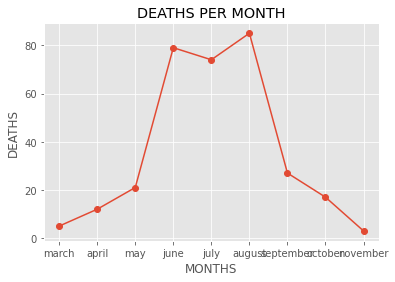

In [22]:
plt.plot(data.month.unique(),death_per_month,marker='o')
plt.xlabel('MONTHS')
plt.ylabel('DEATHS')
plt.title('DEATHS PER MONTH')
#plt.grid()

plt.xticks(ticks=data.month.unique().tolist(),labels=xlabel);

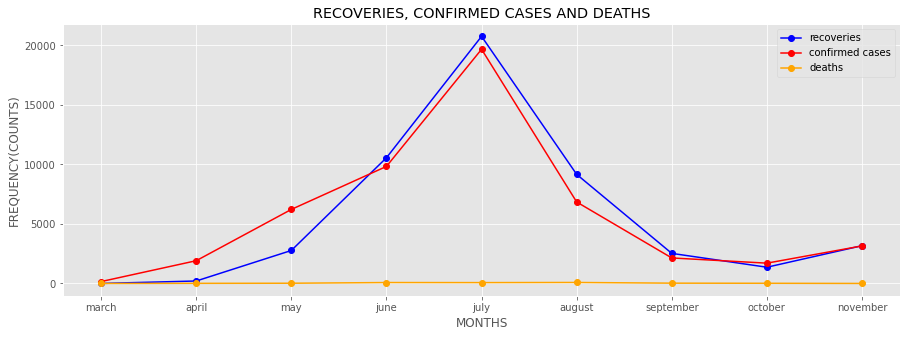

In [23]:
plt.subplots(figsize=(15,5))
plt.plot(data.month.unique(),recovered_cases,marker='o',color='blue',label='recoveries')

plt.plot(data.month.unique(),confirmed_cases,marker='o',color='red',label='confirmed cases')

plt.plot(data.month.unique(),death_per_month,marker='o',color='orange',label='deaths')

plt.xlabel('MONTHS')
plt.ylabel('FREQUENCY(COUNTS)')
plt.title('RECOVERIES, CONFIRMED CASES AND DEATHS')
plt.legend()
#plt.grid()

plt.xticks(ticks=data.month.unique().tolist(),labels=xlabel);

In [24]:
cumulat_confirmed=data.groupby('month')['cumulative_confirmed '].sum()
cumulat_confirmed


month
03        957
04      12497
05     154285
06     373327
07     843767
08    1273184
09    1375993
10    1280667
11    1358948
Name: cumulative_confirmed , dtype: int64

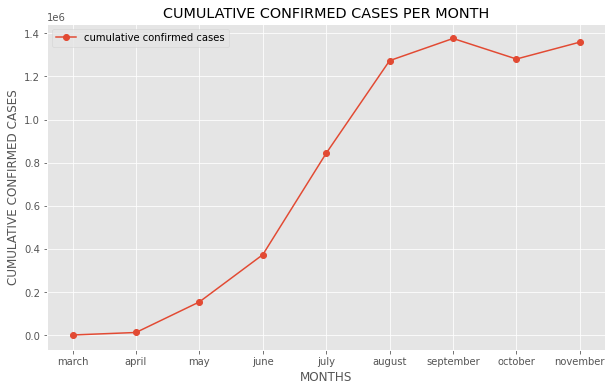

In [25]:
plt.subplots(figsize=(10,6))
plt.plot(data.month.unique(),cumulat_confirmed,marker='o',label='cumulative confirmed cases')
plt.xlabel('MONTHS')
plt.ylabel('CUMULATIVE CONFIRMED CASES')
plt.title('CUMULATIVE CONFIRMED CASES PER MONTH')
plt.legend()
plt.xticks(ticks=data.month.unique().tolist(),labels=xlabel);

In [26]:
cumulat_recovered=data.groupby('month')['cumulative_recovered'].sum()
cumulat_recovered

month
03         21
04       1083
05      40900
06     207489
07     722446
08    1208292
09    1348898
10    1260541
11    1320391
Name: cumulative_recovered, dtype: int64

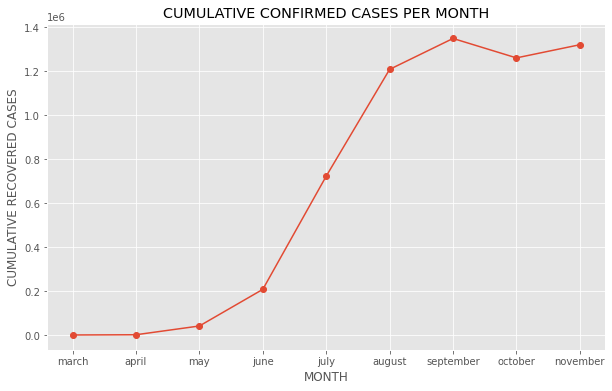

In [27]:
plt.subplots(figsize=(10,6))
plt.plot(data.month.unique(),cumulat_recovered,marker='o')
plt.xlabel('MONTH')
plt.ylabel('CUMULATIVE RECOVERED CASES')
plt.title('CUMULATIVE CONFIRMED CASES PER MONTH')

plt.xticks(data.month.unique().tolist(),xlabel);

In [28]:
cumulat_death=data.groupby('month')['cumulative_death'].sum()
cumulat_death

month
03      31
04     140
05     741
06    2064
07    4486
08    7251
09    8810
10    8419
11    8690
Name: cumulative_death, dtype: int64

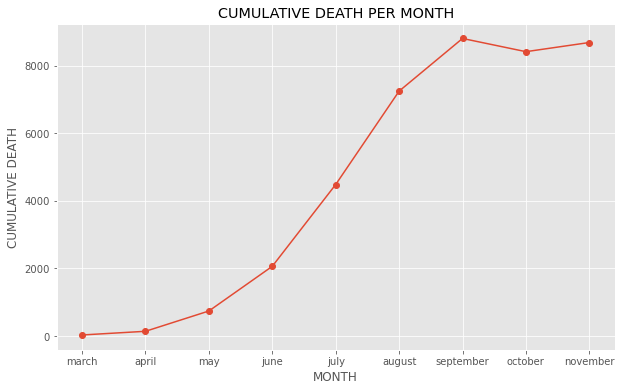

In [29]:
plt.subplots(figsize=(10,6))
plt.plot(data.month.unique(),cumulat_death,marker='o')
plt.xlabel('MONTH')
plt.ylabel('CUMULATIVE DEATH')
plt.title('CUMULATIVE DEATH PER MONTH')

plt.xticks(data.month.unique().tolist(),xlabel);

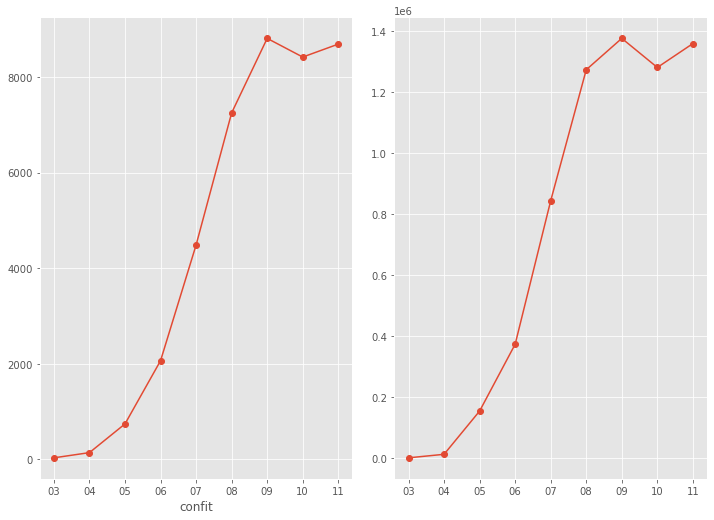

In [40]:
fig,ax=plt.subplots(1,2,figsize=(10,7))

fig.tight_layout()


ax[0].plot(data.month.unique(),cumulat_death,marker='o')
ax[1].plot(data.month.unique(),cumulat_confirmed,marker='o')